In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [75]:
df_graph = pd.read_excel("graph.xlsx")

In [76]:
df_graph

,0,1,1.1,0.1,0.2,0.3,0.4,0.5,0.6,0.7,...,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39
0,1,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
df_graph.drop(columns=df_graph.columns[0], 
        axis=1, 
        inplace=True)

In [79]:
# df_graph.insert(loc=0, column='row_num', value=np.arange(len(df_graph)))
df_graph.head()

,1,1.1,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39
0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [80]:
df_graph.columns = list(range(0, 41))

In [81]:
df_graph

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
g = nx.from_pandas_adjacency(df_graph)

In [83]:
# Function: plotting graph
def plot_graph(G, added_title=" ", dpi=600):
    """
    Исцртување на обичен граф

    colors - SIR: ["#313695", "#a50026", "#004529"]

    @param G: Граф
    @param added_title: наслов на график
    @return:
    """
    fig, ax = plt.subplots(figsize=(4, 4), dpi=80)
    fig.set_size_inches(6, 4, forward=True)
    pos = nx.spring_layout(G, seed=2)
    nx.draw_networkx_nodes(G, pos=pos, ax=ax, cmap=plt.cm.Reds, node_size=100, alpha=.75)
    nx.draw_networkx_edges(G, pos=pos, ax=ax, edge_color="#a2a2a2", alpha=.6)
    plt.title(added_title)
    ax.axis("off")
    # plt.savefig("2.png")
    plt.show()
# Function: node degree distribution
def plot_node_degree(G):
    """
    Степенска дистрибуција

    @param G: Графот од кој се влече
    @return: /
    """

    deg = [x[1] for x in list(nx.degree(G))]
    fig, ax = plt.subplots(figsize=(7, 7), dpi=120)
    fig.set_size_inches(6, 4, forward=True)
    plt.title("Распределба на број на соседи")
    sns.distplot(deg, hist=True, kde=True, color='green',
                 hist_kws={'edgecolor': 'black'},
                 kde_kws={'shade': True, 'linewidth': 1})
    ax.set_xticks(np.arange(0, max(deg) + 15, 15))
    plt.ylabel("% на јазли")
    plt.xlabel("Број на соседи (степен)")
    # plt.savefig("1.png")
    plt.show()

In [84]:
for i in range(0, len(g.nodes)):
    print(i, list(g.neighbors(i)))

0 [1, 2, 3]
1 [0, 3, 5]
2 [0, 3, 4, 6]
3 [0, 1, 2, 5]
4 [2, 6, 7, 9]
5 [1, 3, 8, 11]
6 [2, 4, 9, 12]
7 [4, 9, 10, 13]
8 [5, 11, 12, 15]
9 [4, 6, 7, 12]
10 [7, 13, 14, 16]
11 [5, 8, 15, 18]
12 [6, 8, 9, 15]
13 [7, 10, 16, 19]
14 [10, 16, 17, 20]
15 [8, 11, 12, 18]
16 [10, 13, 14, 19]
17 [14, 20, 21, 24]
18 [11, 15, 22, 25]
19 [13, 16, 23, 27]
20 [14, 17, 24, 28]
21 [17, 24]
22 [18, 25, 26, 29]
23 [19, 27, 28, 31]
24 [17, 20, 21, 28]
25 [18, 22, 29, 32]
26 [22, 29, 30, 33]
27 [19, 23, 31, 34]
28 [20, 23, 24, 31]
29 [22, 25, 26, 32]
30 [26, 33, 34, 36]
31 [23, 27, 28, 34]
32 [25, 29, 35, 37]
33 [26, 30, 36, 38]
34 [27, 30, 31, 36]
35 [32, 37, 38, 39]
36 [30, 33, 34, 38]
37 [32, 35, 39, 40]
38 [33, 35, 36, 39]
39 [35, 37, 38, 40]
40 [37, 39]


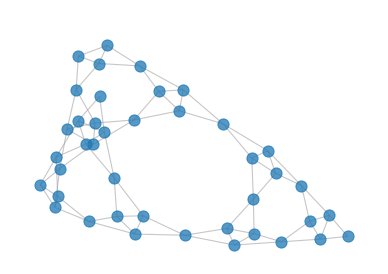

/home/zelenkastiot/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


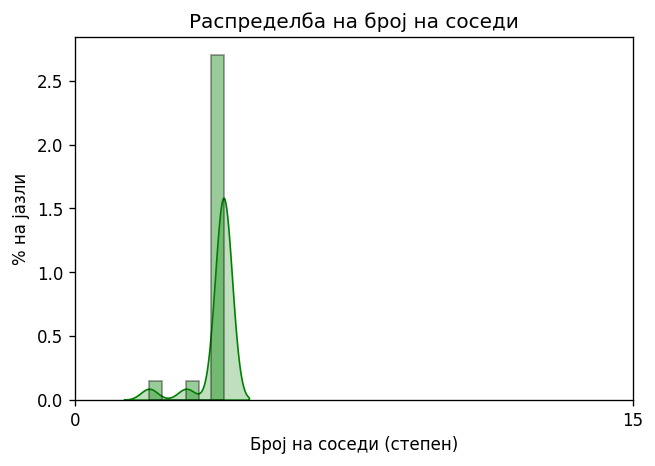

In [85]:
plot_graph(g)
plot_node_degree(g)

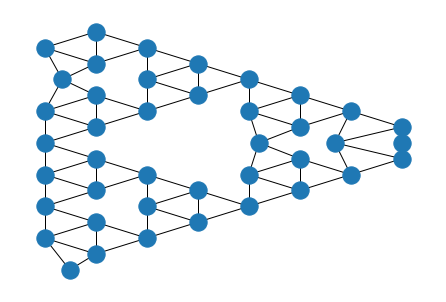

In [87]:
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

T = nx.balanced_tree(2, 5)

pos = graphviz_layout(g, prog="dot")
nx.draw(g, pos)
plt.show()